# Hand Gesture Recognition

Abstract

Use of hand gestures is a common way of communication and we do a lot of hand gesture in our daily life. Imagine a presentation being done without the use of any remote or mouse control but using gestures. There are devices which are used to measure these hand gestures. The project is focused on the conversion of the extracted voltage fluctuation output from the device into a meaningful gesture.

Device and Data

The device that is used for generating the data points is home made. We[1] have created a glove which uses flex sensor, accelerometer and gyroscope to measure finger and hand movements. The device uses Arduino2560 programmer for generation of the signals and writing it to any serial port.

Using the above configuration, around 10 training and test data (gestures) is generated. 

Machine Learning Proposal

The data from accelerometer and gyroscope are time series data points. Use of Dynamic Time Warping (DTW) algorithm seems to be more relevant in this case. DTW is used for measuring similarity between two temporal sequences. Let us assume you have made a gesture of the alphabet ‘O’. Now to do that all you have to do a circle with your hand. This dimensions and speed of the gesture might vary from person to person but they are all similar. DTW can measure this similarity in a efficient manner. We will discuss this further along the path.

Finger movement are detected by flex sensors which has a range of value and more or less same for all person. Using all the three data types as one dimension does not make much sense. I am proposing a ensemble learning and gain more info along the progress.

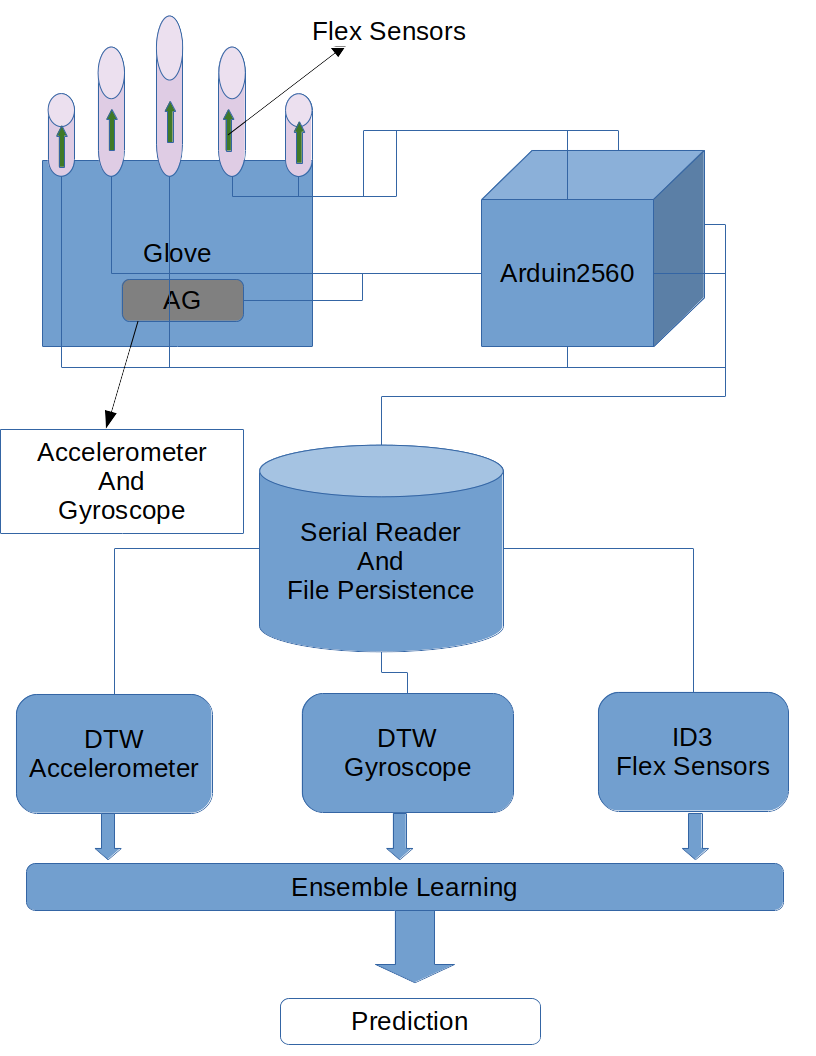

In [1]:
from IPython.display import Image
Image(filename='./Block_Diagram.png', width=500)

Data Metrics

X = [3.61,15.16,-4.81,-0.07,1.07,1.52,99.00,60.00,54.00,99.00,2.00]

First three values are x,y and z from accelerometer.
Next three values are angular velocity of x,y and z co-ordinates from gyroscope.

Last five values are finger position right from thumb to little finger (pinky) from flex sensors (5).

# Phase - I 

<b>Data Generation :</b> 
Since the device dumps data onto serial port , we are going to need a serial port reader which can not only reads it but also saves it for training and test purposes. The following code uses python's threading capabilities to read the serial data. The reason threading is required as we need an interactive session to generate test and train data which can take inputs from command line in foreground while reading from serial port and dumping data on disk in background.

In [2]:
import threading
import serial 


class SerialReader (threading.Thread):

    def __init__(self, threadID, name, counter):
        threading.Thread.__init__(self)
        self.threadID = threadID
        self.name = name
        self.counter = counter
        self.exit = False
        self.ser = serial.Serial('/dev/ttyACM1', 9600)
        self.data = []
    
    def stop(self):
        self.exit = True
        return self.data
        
    def run(self):
        while not self.exit:
            self.data.append(self.ser.readline())
        self.ser.close()
        

Using the above thread base serial reader to create our interactive tool for data generation.

<b>Note : </b>Expects the device to be connected for generating data. 

In [6]:
import os.path as osp
import sys

FOLDER_SPACE = "/home/sabyasachi/Documents/Indiana_University/Spring_2018/Applied_Machine_Learning/Final_Project/test/"


def start():
    while True:
        cmd = input('Enter T for train , type anything else to exit : ')
        processCmd(cmd)


def train():
    word = input('Enter the word for training : ')
    while True:
        cmd = input('Press enter to start or "e" to exit : ')
        if cmd == '':
            rdr = SerialReader(1, "Reader-Thread", 1)
            rdr.start()
            input('Press enter to stop : ')
            data = rdr.stop()
            storeData(word, data)
        elif cmd == 'e':
            break;


def processCmd(cmd):
    if cmd.upper() == 'T':
        train()
    else:
        print('Exiting ...  ')
        sys.exit(0)          


def storeData(word, data):
    filename = "_".join(word.split()) 
    file = open(FOLDER_SPACE + osp.sep + filename + '.txt', 'a+', 1024)
    for dp in data:
        file.write(dp.decode('utf-8', 'ignore'))
    file.write("---------END--------\n")
    file.close()

# Requires main from threading
if __name__ == "__main__":
    start()


Enter T for train , type anything else to exit : e
Exiting ...  


SystemExit: 0

/home/sabyasachi/Programs/anaconda/envs/iuconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Using the above tool , both training and testing data has been generated and store in data and test folder respectively.

# Exploratory Data Analysis

We will now analyze the train data generated for gesture "hi".